In [2]:
from config import BEARER_TOKEN
from TwitterAPI import TwitterAPI
import pandas as pd
from config import *

In [3]:
twitter = TwitterAPI(BEARER_TOKEN=BEARER_TOKEN)

In [6]:
def translate(data):
    data['followers'] = data['public_metrics']['followers_count']
    data['following'] = data['public_metrics']['following_count']
    data['following_ids'] = None
    data.pop('public_metrics')
    return data

In [4]:
starting_nodes = [
    1252764865, # Nicolas Maduro
    128262354, # Diosdado Cabello
    1644228493, # Delcy Rodriguez
    109601997, # Jorge Rodríguez
    39176902, # Juan Guaido
    14119371, # Julio Borges
    42434332, # Leopoldo Lopez
    47491330, # Henrique Capriles
    102482331, # Maria Corina Machado
]

In [32]:
df = pd.DataFrame.from_dict([ translate(twitter.get_user(n)['data']) for n in starting_nodes]).set_index('id')
df

,username,name,followers,following,following_ids
id,,,,,
1252764865,NicolasMaduro,Nicolás Maduro,3978697,115,None
128262354,dcabellor,Diosdado Cabello R,2558260,23191,None
1644228493,delcyrodriguezv,Delcy Rodríguez,574896,662,None
109601997,jorgerpsuv,Jorge Rodríguez,1219303,222,None
39176902,jguaido,Juan Guaidó,2636352,2846,None
14119371,JulioBorges,Julio Borges,1580556,98507,None
42434332,leopoldolopez,Leopoldo López,5308529,319828,None
47491330,hcapriles,Henrique Capriles R.,7107571,1983,None


In [40]:
def next_level(df):
    df = df.copy()
    
    for idx in df.index:
        res = twitter.get_user_following(idx)
        
        data = []
        ids = []
        for r in res['data']:
            data.append( translate(r) )
            ids.append( str(r['id']) )
        
        df.loc[idx, 'following_ids'] = ','.join(ids)
        new_df = pd.DataFrame.from_dict(data).set_index('id')
        
        new_ids = set(new_df.index) - set(df.index)
        df = df.append(new_df.loc[new_ids])
    return df

In [41]:
gg = next_level(df)
gg

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [19]:
# Comenzamos a buscar
user_id = df.iloc[0]['id']
res = twitter.get_user_following(user_id)

data = []
ids = []
for r in res['data']:
    data.append( translate(r) )
    ids.append( str(r['id']) )

df.iloc[0, -1] = ','.join(ids)
df = pd.concat( (df,  pd.DataFrame.from_dict(data)) ).set_index('id')
df.followers.hist()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

<AxesSubplot:>

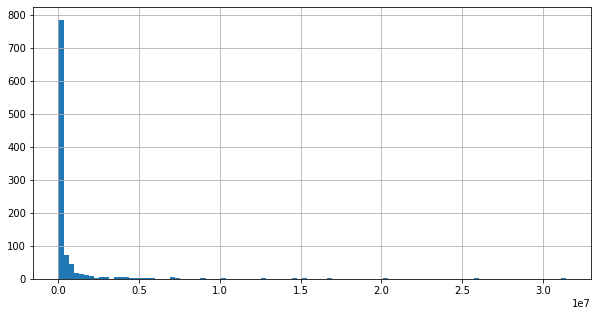

In [23]:
df.followers.hist(bins=100, figsize=(10,5))